In [1]:
# Imports all packages necessary or useful

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Reads our medical_clean data csv file for analysis

df = pd.read_csv(r'C:\Users\caleb\OneDrive\Desktop\WGU\D212 - Data Mining II\medical_clean.csv')

In [3]:
# Profiles our csv file following importing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
# Gives us a snapshot of values contained in each of our variables

pd.set_option("display.max_columns", 0)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
# Detects any duplicated observations in our data set

df.duplicated().value_counts()

False    10000
dtype: int64

In [6]:
# Detects any null values in our data set

df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [7]:
# Explores variables we are interested in

df['Population'].describe()

count     10000.000000
mean       9965.253800
std       14824.758614
min           0.000000
25%         694.750000
50%        2769.000000
75%       13945.000000
max      122814.000000
Name: Population, dtype: float64

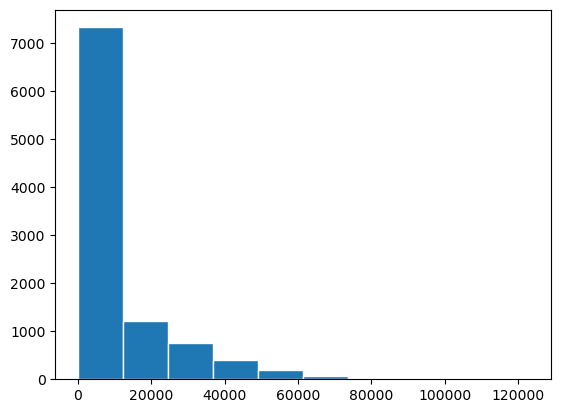

In [8]:
# Visualizes our variable

plt.hist(data=df, x='Population', edgecolor="white")
plt.show()

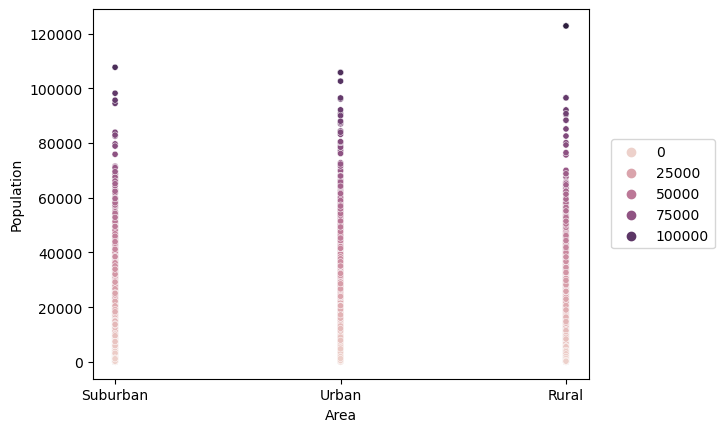

In [9]:
# Visualizes Population by Area

sns.scatterplot(data = df, x = 'Area', y = 'Population', hue = 'Population', s = 20)
plt.legend(bbox_to_anchor=(1.15, 0.5), loc='center', borderaxespad=0)

In [10]:
# Explores variables we are interested in

df['Children'].describe()

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

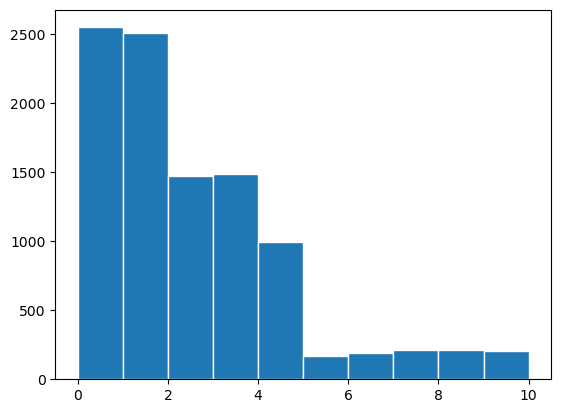

In [11]:
# Visualizes our variable

plt.hist(data=df, x='Children', edgecolor="white")
plt.show()

In [12]:
# Explores variables we are interested in

df['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

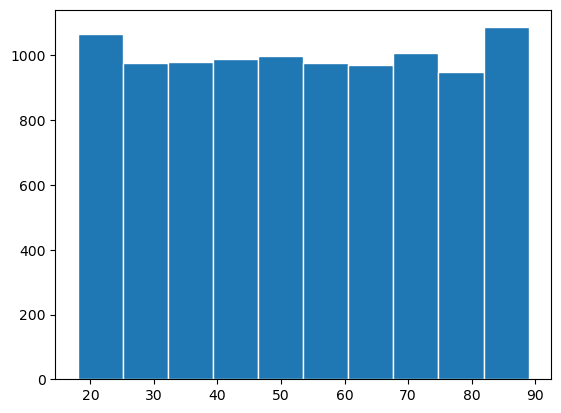

In [13]:
# Visualizes our variable

plt.hist(data=df, x='Age', edgecolor="white")
plt.show()

In [14]:
# Explores variables we are interested in

df['Income'].describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

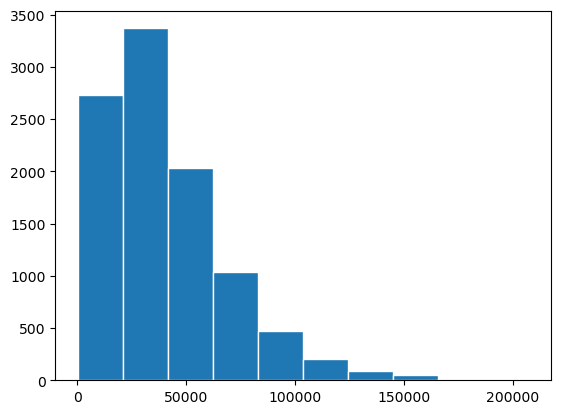

In [15]:
# Visualizes our variable

plt.hist(data=df, x='Income', edgecolor="white")
plt.show()

In [16]:
# Explores variables we are interested in

df['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

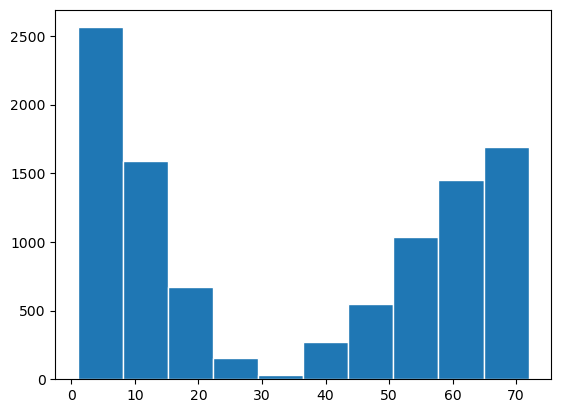

In [17]:
# Visualizes our variable

plt.hist(data=df, x='Initial_days', edgecolor="white")
plt.show()

In [18]:
# Saves our working data as a new dataframe: taskdf

taskdf = df[['Population', 'Children', 'Age', 'Income', 'Initial_days']]

In [19]:
# Calls taskdf

taskdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    10000 non-null  int64  
 1   Children      10000 non-null  int64  
 2   Age           10000 non-null  int64  
 3   Income        10000 non-null  float64
 4   Initial_days  10000 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [20]:
# Futher explores taskdf with less clutter

taskdf.head()

,Population,Children,Age,Income,Initial_days
0,2951,1,53,86575.93,10.585770
1,11303,3,51,46805.99,15.129562
2,17125,3,53,14370.14,4.772177
3,2162,0,78,39741.49,1.714879
4,5287,1,22,1209.56,1.254807


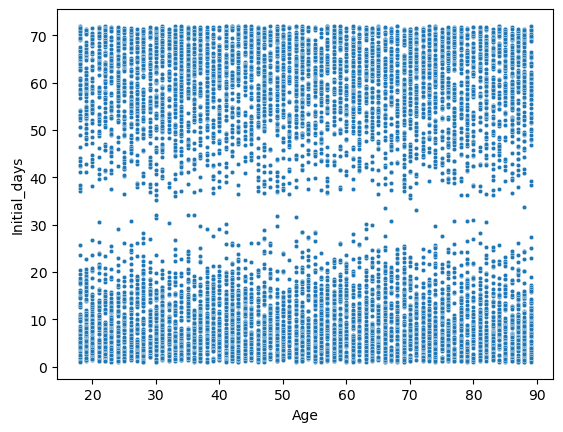

In [21]:
# Visualizes distribution of patient age (years) versus length of stay (days)

ax = sns.scatterplot(data = taskdf, x = 'Age', y = 'Initial_days', s = 10)

In [22]:
# Creates a dataframe for variables in which we are looking for clusters

clusterdf = df[['Initial_days', 'Age']]
clusterdf.describe()

,Initial_days,Age
count,10000.000000,10000.000000
mean,34.455299,53.511700
std,26.309341,20.638538
min,1.001981,18.000000
25%,7.896215,36.000000
50%,35.836244,53.000000
75%,61.161020,71.000000
max,71.981490,89.000000


In [23]:
# Assigns our scaler operation

scaler = StandardScaler()

In [24]:
# Transforms and fits our variables

scaled_df = scaler.fit_transform(taskdf[['Initial_days', 'Age']])

In [25]:
# Standardizes our variables as a new dataframe

scaled_df = pd.DataFrame(scaled_df, columns = ['Initial_days', 'Age'])
scaled_df

,Initial_days,Age
0,-0.907310,-0.024795
1,-0.734595,-0.121706
2,-1.128292,-0.024795
3,-1.244503,1.186592
4,-1.261991,-1.526914
...,...,...
9995,0.650217,-1.381548
9996,1.300475,1.622691
9997,1.356958,-0.412438
9998,1.098585,-0.509349


In [26]:
# Describes our scaled data
# We appreciate a mean of 0 and standard deviation of 1 to ensure data has been scaled

scaled_df.describe().round(2)

,Initial_days,Age
count,10000.00,10000.00
mean,-0.00,0.00
std,1.00,1.00
min,-1.27,-1.72
25%,-1.01,-0.85
50%,0.05,-0.02
75%,1.02,0.85
max,1.43,1.72


In [27]:
# Constructs our initial kmeans model and fits it to our scaled data
# n_clusters = 2 is selected for initial testing as there appears to be horizontal split through the middle of our 'Age' variable, creating an upper and a lower cluster (2 total)

kmodel = KMeans(n_clusters = 2, n_init = 10, random_state = 8)
kmodel.fit(scaled_df)

KMeans(n_clusters=2, n_init=10, random_state=8)

In [28]:
# Evaluates the model

eval = pd.Series(kmodel.labels_).value_counts()
eval

1    5002
0    4998
dtype: int64

In [29]:
# Finds the center point for each cluster
# We appreciate significantly lower length of stay (initial_days) grouped with slightly lower than average age (cluster 0)
# We apprecaite significantly greater length of stay with somewhat higher than average age

centroid = pd.DataFrame(kmodel.cluster_centers_, columns = ['Initial_days', 'Age'])
centroid

,Initial_days,Age
0,-0.959325,-0.015730
1,0.958557,0.015717


In [30]:
# Within Cluster Sum of Squares number of clusters optimization

wcss = []
for k in range (1, 10): 
    wmodel = KMeans(n_clusters = k, n_init = 50, random_state = 8)
    wmodel.fit(scaled_df)
    wcss.append(wmodel.inertia_)
wcss_s = pd.Series(wcss, index = range(1, 10))

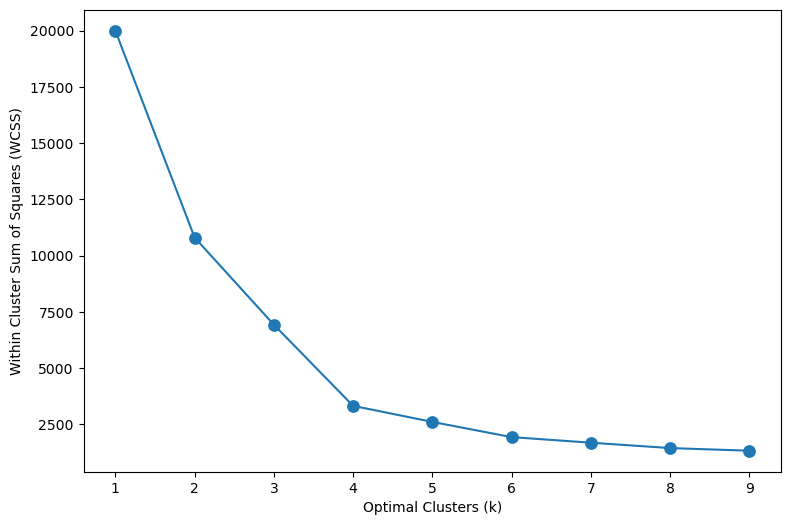

In [31]:
# Visualizes our WCSS score

plt.figure(figsize = (9,6))
ax = sns.lineplot(y = wcss_s, x = wcss_s.index)
ax = sns.scatterplot(y = wcss_s, x = wcss_s.index, s = 100)
ax = ax.set(xlabel = 'Optimal Clusters (k)', ylabel = 'Within Cluster Sum of Squares (WCSS)')

# Slope appears to begin to level out at k = 4

In [32]:
# Defines our silhouette score

silscore = silhouette_score(scaled_df, kmodel.labels_)
silscore

0.4644824158211367

In [33]:
# Silhouette optimization

silhouette = []
for k in range (1, 20): 
    smodel = KMeans(n_clusters = k, n_init = 50, random_state = 8)
    smodel.fit(scaled_df)
    silhouette.append(silscore)

silhouette_s = pd.Series(silhouette, index = range (1,20))

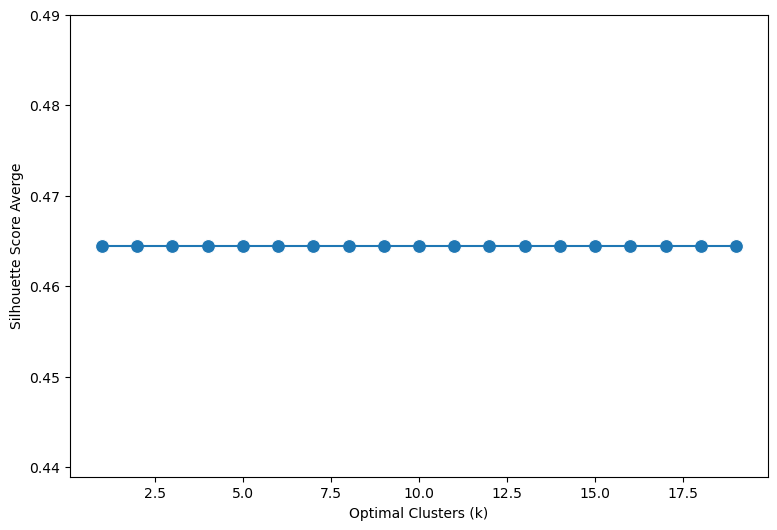

In [34]:
# Visualizes our silhouette optimization chart

plt.figure(figsize = (9,6))
ax = sns.lineplot(y = silhouette_s, x = silhouette_s.index)
ax = sns.scatterplot(y = silhouette_s, x = silhouette_s.index, s = 100)
ax = ax.set(xlabel = 'Optimal Clusters (k)', ylabel = 'Silhouette Score Averge')

# Peak appears relatively constant; silhouette score is not significantly higher or lower at 4 clusters in comparison with WCSS

In [35]:
# Reruns our algorithm to test the silhouette score

kmodel = KMeans(n_clusters = 4, n_init = 10, random_state = 8)
kmodel.fit(scaled_df)

KMeans(n_clusters=4, n_init=10, random_state=8)

In [36]:
# We appreciate a significant increase using 4 clusters versus initiating our algorithm with 2 clusters

silscore = silhouette_score(scaled_df, kmodel.labels_)
silscore

0.5354418292366753

In [37]:
# Reruns our optimized model using n_clusters = 4 per our WCSS and silhouette comparison

optmodel = KMeans(n_clusters = 4, n_init = 10, random_state = 8)
optmodel.fit(scaled_df)

KMeans(n_clusters=4, n_init=10, random_state=8)

In [38]:
# Finds the center point for each cluster for our optimized model

optcentroid = pd.DataFrame(optmodel.cluster_centers_, columns = ['Initial_days', 'Age'])
optcentroid

,Initial_days,Age
0,0.959359,-0.829140
1,-0.962913,-0.875943
2,-0.955687,0.856267
3,0.957719,0.899983


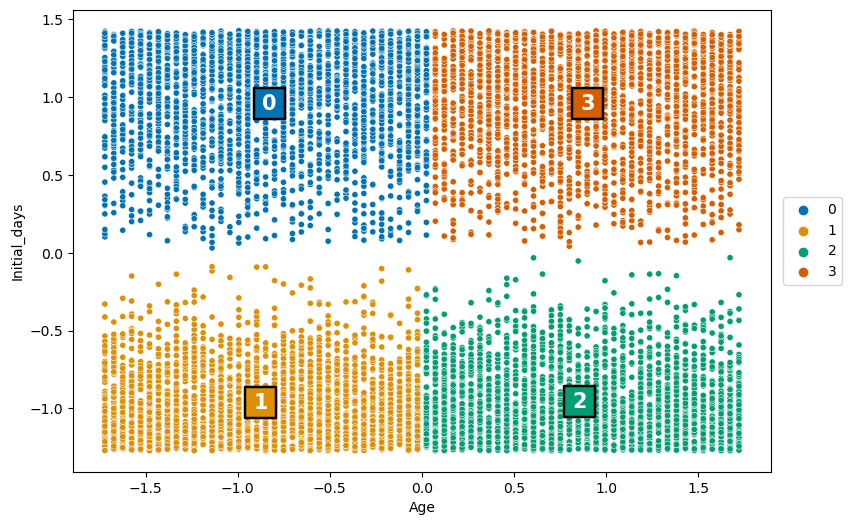

In [39]:
# Plots and labels our clusters

plt.figure(figsize = (9, 6))
ax = sns.scatterplot(data = scaled_df, x = 'Age', y = 'Initial_days', hue = optmodel.labels_, palette = 'colorblind', s = 20, legend = True)
plt.legend(bbox_to_anchor=(1.06, 0.5), loc='center', borderaxespad=0)
ax = sns.scatterplot(data = optcentroid, x = 'Age', y = 'Initial_days', hue = optcentroid.index, palette = 'colorblind', s = 500, marker = 's', ec = 'black', legend = False)
for i in range (len(optcentroid)): 
    plt.text(x = optcentroid.Age[i], y = optcentroid.Initial_days[i], s = i, horizontalalignment = 'center', verticalalignment = 'center', size = 15, weight = 'bold', color = 'white')

In [40]:
# Adds a new column to our optimized model data frame that declares the cluster assignment of a variable

taskdf['Cluster'] = optmodel.labels_.tolist()
taskdf.head(10)

C:\Users\caleb\AppData\Local\Temp\ipykernel_8848\3337938342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taskdf['Cluster'] = optmodel.labels_.tolist()


,Population,Children,Age,Income,Initial_days,Cluster
0,2951,1,53,86575.93,10.585770,1
1,11303,3,51,46805.99,15.129562,1
2,17125,3,53,14370.14,4.772177,1
3,2162,0,78,39741.49,1.714879,2
4,5287,1,22,1209.56,1.254807,1
5,981,3,76,81999.88,5.957250,2
6,2558,0,50,10456.05,9.058210,1
7,479,7,40,38319.29,14.228019,1
8,40029,0,48,55586.48,6.180339,1
9,5840,2,78,38965.22,1.632554,2


In [41]:
# Adds a new column to our optimized model data frame that declares the cluster assignment of a variable

df['Cluster'] = optmodel.labels_.tolist()
df.head(10)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Cluster
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4,1
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3,1
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3,1
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5,2
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3,1
5,6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,America/Chicago,Corporate treasurer,3,76,81999.88,Never Married,Male,No,19.612646,6,0,0,No,Observation Admission,No,No,Medium,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Blood Work,5.957250,2636.691180,12742.589910,4,5,4,4,3,5,4,6,2
6,7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,America/New_York,Hydrologist,0,50,10456.05,Never Married,Male,No,14.751687,6,0,0,No,Emergency Admission,Yes,No,Low,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Intravenous,9.058210,3694.627161,16815.513600,4,3,3,2,3,4,5,5,1
7,8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,America/New_York,Psychiatric nurse,7,40,38319.29,Divorced,Female,No,19.688673,7,2,0,No,Observation Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Intravenous,14.228019,3021.499039,6930.572138,1,2,2,5,4,2,4,2,1
8,9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,America/Chicago,Computer games developer,0,48,55586.48,Widowed,Male,No,19.653320,6,3,0,No,Emergency Admission,No,No,Low,Yes,No,No,Yes,No,No,No,No,No,Intravenous,6.180339,2968.402860,8363.187290,3,3,2,3,3,3,4,2,1
9,10,Z229385,5acd5dd3-f0ae-41c7-9540-cf3e4ecb2e27,687e7ba1b80022c310fa2d4b00db199a,Paynesville,MN,Stearns,56362,45.40325,-94.71424,5840,Urban,America/Chicago,"Production assistant, radio",2,78,38965.22,Never Married,Female,No,18.224324,7,1,2,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,Yes,Yes,Yes,Blood Work

In [42]:
# Aggregates our chosen variables and orders by average

taskdf.agg({'Population': 'mean', 'Children': 'mean', 'Age': 'mean', 'Income': 'mean', 'Initial_days': 'mean'}).round(2)

Population       9965.25
Children            2.10
Age                53.51
Income          40490.50
Initial_days       34.46
dtype: float64

In [43]:
# Groups our aggregated data frame by cluster

taskdf.groupby('Cluster').agg({'Population': 'mean', 'Children': 'mean', 'Age': 'mean', 'Income': 'mean', 'Initial_days': 'mean'}).round(2)

,Population,Children,Age,Income,Initial_days
Cluster,,,,,
0,10314.52,2.10,36.40,39839.29,59.69
1,9876.83,2.01,35.43,41333.67,9.12
2,9613.20,2.09,71.18,40134.52,9.31
3,10048.25,2.19,72.09,40665.57,59.65
